<a href="https://colab.research.google.com/github/irmtou/MachineLearningIsCool/blob/main/MachineLearningIsCool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning in Action: Exploring All the Cool Applications
By Erica Lee 💟


## What is Machine Learning (ML)? 🤔💭
That's a good question! It's not exactly artificial intelligence (AI), but rather a subset of it. Machine Learning focuses on all the systems that learn and improve from data without being specifically programmed to. It essentially enables computers to learn patterns and make predictions from data, kind of like what humans do!

From spam filters to self-driving cars, ML powers countless innovations shaping our world today.


## What are we learning today? 📚
In our hands on workshop, we'll dive into the exciting and practical applications of machine learning. Together we'll explore:
### 1. Spam Email Classifier with Naive Bayes 📧


Learn how ML helps differentiate spam emails from important ones using simple yet effective probabilistic models.
### 2. Image Color Clustering with K-means 🎨

Discover how unsupervised learning can extract dominant colors from images for tasks like design, art, and photo editing.
### 3. Object Detection with Deep Learning and YOLOv8 🔍

Witness how cutting-edge computer vision models identify objects in images and videos with remarkable speed and accuracy.
### 4. Generative Pre-trained Transformers with GPT-2 ✨

Explore how generative models create coherent, human-like text by predicting the next word in a sequence.



--- Let's dive in! ---

# 1. 📧 Supervised Learning: Spam Email Classifier 📧
Ever wonder how your email inbox decides what's spam and what's not? This is a classic example of supervised learning in machine learning. In this demo, we are training a model based on a labeled dataset. In spam.csv, there are over 5000 entries, each with a label: **"spam"** or **"ham"** (i.e. not spam).

Let's dive into the dataset and train a model that can classify if a message sounds spammy (or not).

### Importing libraries
#### Scikit Learn (`sklearn`)
There are a lot of imports from `sklearn`, the shortened version of sci-kit learn. This is a great library for many data science / statistics / machine learning applications in Python.
[More on scikit-learn here](https://scikit-learn.org/stable/)

* `CountVectorizer` converts text data into a bag-of-words representation for ML models. This is crucial for many text-based classification tasks.

* `train_test_split` is a function that splits the dataset into training and testing sets. We split the dataset to allow for use to evaluate the model's performance. Is it generalizing well to the data or is it performing poorly on unseen data? This is a big part of these model evaluations to prevent overfitting and bias.

* `MultinomialNB` implements the Multinomial Naive Bayes algoritm, used often for text classification tasks. The main idea is that it assumes each word in a message or feature is independent of each others. This means the presence of one word doesn't affect the presence of another word.

* `accuracy_score` calculates the accuracy of the model (i.e. how many the model classifies correctly).

#### Common data science libraries in Python
* `pandas` is a library you'll see a lot when working with dataframes, a type of data structure in Python.

* `matplotlib.pyplot` is a plotting library that visualizes metrics in a pretty way.


In [ ]:
# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

### Loading the dataset
Utilizing the Pandas `read_csv` function to take a .csv file and convert it to a Pandas dataframe.
We specify the encoding to correctly read the dataset which includes special characters.

In [ ]:
data = pd.read_csv('spam.csv', encoding='latin-1')

### Exploratory Data Analysis (EDA)
We're examining what this dataset consists of. We've selected 5 random rows to look at the contents, including the column names, data types, and example rows.

In [ ]:
# Inspect the dataset
print(data.sample(5))

       v1                                                 v2 Unnamed: 2  \
5082  ham  Amazing : If you rearrange these letters it gi...        NaN   
2702  ham  Omw back to tampa from west palm, you hear wha...        NaN   
4651  ham                             Where r e meeting tmr?        NaN   
3232  ham  Height of recycling: Read twice- People spend ...        NaN   
3674  ham                           Whos this am in class:-)        NaN   

     Unnamed: 3 Unnamed: 4  
5082        NaN        NaN  
2702        NaN        NaN  
4651        NaN        NaN  
3232        NaN        NaN  
3674        NaN        NaN  


Looks like the index is simply an integer value. Column `v1` shows the label and column `v2` is the text string itself. The rest don't seem relavant to our task.

## More EDA
By counting the occurances of spam and non-spam emails, we can see if there's a particular imbalance of class distribution with the data in our dataset. After all, more data to learn from is generally the big thing with ML. Therefore if we have more of one category, the model may be more biased towards that category, since it has seen more examples.

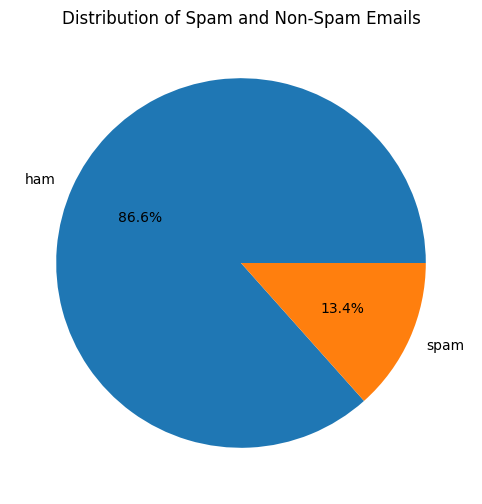

In [ ]:
data['v2'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(data['v1'].value_counts(), labels=data['v1'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Spam and Non-Spam Emails')
plt.show()

There are way more non-spam emails than spam emails. This means with testing, we may see more spam emails misclassified as non-spam.

We can take note of that and move on with preprocessing our data.

## Preprocessing the data
Our column `v2` represents the text messages from the dataset, which is the input feature for the model. We call this X.

The `v1` column is the preprocessing label y, and encodes the strings "spam" and "ham" into binary values 1 and 0, respectively. This is so our algorithm can clearly classify these numerical values.

In [ ]:
# Preprocess the dataset
X = data['v2']  # Text messages
y = data['v1'].apply(lambda x: 1 if x == 'spam' else 0)  # Convert labels to binary (1 = spam, 0 = not spam)


## Vectorizing inputs
We vectorize our input into a matrix of token counts. These can be thought of as a piece of text, a character, a punctation mark, or a number. Tokenizing the text just means breaking the text down, which makes each token a unit. This is used for models to understand and process language.

In [ ]:
# Vectorize the text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

## Splitting into training and testing subsets

Splitting data into training and testing sets is crucial for model evaluation to demonstrate that it can predict unseen data (in the real-world). This process helps with overfitting, where the model could be learning too much from the training data. This makes the model fail to generalize on new data.

### Silly example
You can think of this as a young child learning the names of animals. If you teach them that a dog is a furry creature with four legs and a tail that makes noises, perhaps during a zoo trip, they'll think a fox is a dog too.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Initializing the Naive Bayes Model
We're training our model based on this classification algorithm. It's often used for text data where words are independent and follow a form of multinomial distribution. It handles these tasks well because of its effectiveness with high-dimensional sparse data, such as word count.

In [ ]:
# Train a Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

## Model evaluation
Once trained on the subset allocated for training the model, we evaluate the unseen data set aside for testing. Accuracy is based on the number of correct predictions over the total number of predictions. This metric tells us how well our model performs.

*Note: There are many other metrics that tell us more about the model's performance; this is just one of them.*

In [ ]:
# Evaluate the model
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.97847533632287


## Try it out for yourself!
Try entering a string of data and see if our model trained on this dataset can accurately predict its classification.

*Note: Remember that there may be a bias towards non-spam emails as seen in our exploratory data analysis.*

In [ ]:
# Predict on new data
new_email = ["Enter in this giveaway to win $10000! You could be the next winner", "Can you make it to the meeting 2day, I'm in a rush, thx"]
new_email_vectorized = vectorizer.transform(new_email)
print("Prediction (1=spam, 0=not spam):", model.predict(new_email_vectorized))

Prediction (1=spam, 0=not spam): [1 0]


In [ ]:
# Sample data: Email text and labels (1 = spam, 0 = not spam)
emails = [
    "Win money now! Go to our website and enter your phone number to win!",
    "Call for free prizes!",
    "Meeting schedule attached, don't be late please.",
    "You have been hacked. Click here to change your password.",
    "Don't miss our discount sale!"
]
labels = [1, 1, 0, 1, 0]

print("Prediction (1=spam, 0=not spam):", model.predict(vectorizer.transform(emails)))

Prediction (1=spam, 0=not spam): [1 1 0 0 0]


# 2. 🖼️ Unsupervised Learning: Image Color Clustering Using K-Means 🎨

Unsupervised learning takes on many forms. A popular algorithm involves using K-means clustering to group data points together, often revealing hidden patterns without the need for labeled data.

This demo clusters colors from an image to identify key color palettes in an image. We could also use this to design a theme based on image colors.

This is a classic example of how unsupervised learning can be applied to cluster similar data points together.

## Importing necessary libraries and tools
This installs the pillow library, which isn't one of the default libraries already installed in Google Colab.

In [ ]:
pip install pillow

These imports are for working with images and performing machine learning tasks.

`sklearn.cluster.KMeans` is the machine learning algorithm used for clustering, and `skimage.io` and `skimage.transform` facilitate image reading and resizing.

`PIL` (Pillow) is used for image manipulation, and `urllib.request` allows fetching images from the web.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
from skimage.io import imread
from skimage.transform import resize
from PIL import Image
import urllib.request

*Note: This demo works with image URLs in JPG only! Using a PNG image might give you a warning about your webcam later down the road (this is because of a library that utilizes real time object detection). It should still work regardless, but keep that in mind.*

## Trying out images in computer vision tasks
This part of the demo requires image URLs. Here's how to get one for this part.
### Get an image's URL
1. Search up an image on a web browser (e.g. Google)
2. Right click the image
3. Click **"Copy image address"**

### Sample URLs in case you couldn't figure it out

Our beautiful Student Union
- https://sacd.sdsu.edu/_resources/images/sll/conradpreb-589.jpg

The sculpture thing on the Campanile Walkway:
- https://www.sdsualumni.org/s/997/images/editor/tours/tour_9/figure_9.15_c25_100_years_100_stones_image_phil_sdsu_024_copy.jpg

> 🗣️ ... DID YOU KNOW: that if you stand right at the center of this thing and speak out loud, it sounds like you're speaking into a microphone? Yeah, me neither. It's actually pretty cool, it's like an echo chamber right in the middle of a bunch of empty space. I don't know how they did it, but it's pretty sick. You should check it out if you ever pass by the sculpture. They don't even have some sort of plaque that tells you this, I overheard it from some freshman once...

The SDSU Love Library:

- https://www.sdsu.edu/news/2020/08/_images/8-11-20_library_589.jpg

A view of Hepner Hall and some flowers too:

- https://htm.sdsu.edu/images/uploads/Hepner_wide_flowers.jpg

Our lovely Storm Hall:

- https://lpa-design-studios.imgix.net/content/heros/Projects/Higher-Education/SDSU-Storm-and-Nasatir-Hall4.jpg?auto=format&domain=lpa-design-studios.imgix.net&fit=crop&fp-x=0.5&fp-y=0.5&h=1121&ixlib=php-2.1.1&q=60&w=1920

Some photo of Fortnite because I thought it'd be funny:

- https://www.theneweconomy.com/wp-content/uploads/2018/10/Fortnite.jpg

## Saving a JPG from URL
This code chunk allows you to fetch an image from a URL and save it locally on your system, which is useful for our next few tasks dealing with image processing.

Once the image is downloaded, we can use it as input for computer vision tasks.

Enter your URL link in the string input of `url`.

In [ ]:
# This will upload a url and convert it to JPG
url = "https://htm.sdsu.edu/images/uploads/Hepner_wide_flowers.jpg"
headers = {"User-Agent": "Mozilla/5.0"}
req = urllib.request.Request(url, headers=headers)

# Download the image
with urllib.request.urlopen(req) as response:
    with open("img.jpg", "wb") as file:
        file.write(response.read())
# Open and show the image
img = Image.open("img.jpg")

## Display original image
To make sure we did it right, we can use Matplotlib's plot feature to see our original image before we preprocess it.

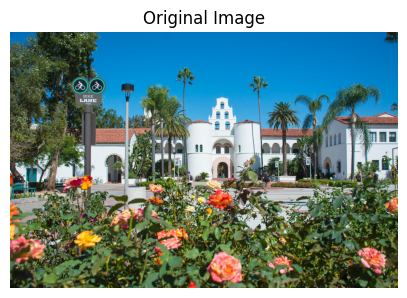

In [ ]:
# Display our image
plt.figure(figsize=(5, 5))
plt.title("Original Image")
plt.imshow(img)
plt.axis('off')
plt.show()

## Preprocessing the image
With machine learning tasks, they can get computationally very, very heavy. We can resize the image into a 100 x 100 pixel image to reduce computation intensity.

We can then flatten the image into an array for our algorithm

In [ ]:
# Resize the image for faster computation
image_resized = img.resize((100, 100))
# Convert the resized image to a NumPy array
image_array = np.array(image_resized)
# Flatten the image into a 2D array (each row represents a pixel)
pixels = image_array.reshape(-1, 3)

## Display manipulated image
This is what our image looks like once resized. A bit more pixelated for us, but this is much easier for calculations.

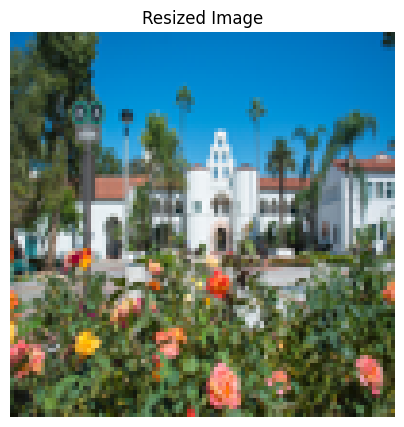

In [ ]:
# Display the resized image
plt.figure(figsize=(5, 5))
plt.title("Resized Image")
plt.imshow(image_resized)
plt.axis('off')
plt.show()

## Using K-means clustering
We're utlizing a K-means clustering model with 5 clusters (default for this demo, feel free to change it). The algorithm will try to group the pixels into 5 distinct clusters based on their color.

Finding the centroid will give us the average RGB value for each cluster, which is considered the dominant color in the image.

In [ ]:
# K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(pixels)
dominant_colors = kmeans.cluster_centers_

## Displaying our color pallette
By converting the floating value points into integers, we can represent our colors properly. This plots our colors in a nice colorful bar.

It's giving Pantone color swatches.

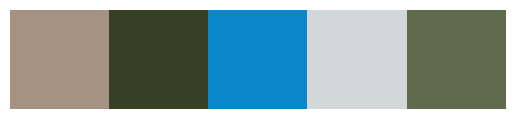

In [ ]:
# Ensure the colors are in the correct range for RGB (0-255)
dominant_colors = np.clip(dominant_colors, 0, 255).astype(int)
# Plot the dominant colors
plt.imshow([dominant_colors])  # Plot as a 1xN image (1 row with N dominant colors)
plt.axis('off')  # Cleaner display
plt.show()

Very artsy, very nice.

See if it captured all the main colors in the photo!

If you want to expand the number of colors in the color palette, increase the number of clusters!

# 3. 🔍 Object Detection with YOLOv8 (Pretrained on COCO dataset) 🆔
uhh... YOLO? Like "You Only Live Once"?? Why is this model named YOLO?

Introducing YOLOv8, short for "You Only Look Once, version 8." It's actually a pretty recent development released to the public, so now we can experiment with it. It uses deep learning to identify and locate images in real-time.

This is seen in autonomous driving, security systems, and robotics due to its abilty to process information fast. It's also used in healthcare to detect anomalies in medical imaging, like detecting skin cancer or brain tumors.

This model is pretrained on Microsoft's COCO image database, a HUGE set of captioned images. Like real huge, we're talking 330K images (with more than 200K labeled). Inside the images too, there are 1.5 million object instances which is primarily what YOLO models use for object detection (and more).

Unfortunately, real-time implementation isn't included in this demo, so if you're interested, look more into this ML architecture here:

https://yolov8.com/

You can even connect your webcam and explore its capabilities live! (That was too much for me to do, plus I wanted to continue using the image we had in the other mini-demo)

## Installing the libraries and other dependencies
You know the drill now.

Ultralytics is the company behind these YOLO computer vision models. They have some pretty neat stuff, I recommend checking them out.

In [ ]:
!pip install ultralytics --quiet
from ultralytics import YOLO
from PIL import Image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.0/887.0 kB 13.0 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Importing our model, YOLOv8

In [ ]:
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 193MB/s]


## Prediction and results
Using the image from our color clustering demo, we can use the YOLOv8 model to detect and label objects in our image.

In the output, we can see all the objects that the model detected. We don't know too much about its certainty (probability of it being correct), so let's dive into it.

In [ ]:
results = model.predict("img.jpg")


image 1/1 /content/img.jpg: 448x640 3 persons, 1 bench, 2 apples, 2845.9ms
Speed: 32.0ms preprocess, 2845.9ms inference, 38.5ms postprocess per image at shape (1, 3, 448, 640)


## An assortment of results
`len(result.boxes)` outputs the number of objects detected in the image.

In [ ]:
result = results[0]
len(result.boxes)

6

### More results
This code extracts, formats, and presents the core output of an object detection model, making it usable for downstream tasks like drawing bounding boxes or making decisions.

With the class ID, coordinates, and confidence, this helps us identify, locate, and determine how reliable the detection is, enabling applications like automated alerts, tracking, or filtering results.


In [ ]:
box = result.boxes[0]
print("Object type:", box.cls)
print("Coordinates:", box.xyxy)
print("Probability:", box.conf)
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: tensor([0.])
Coordinates: tensor([[1037.3151,  567.0637, 1074.7504,  664.3447]])
Probability: tensor([0.5950])
Object type: 0.0
Coordinates: [1037.3150634765625, 567.0636596679688, 1074.7503662109375, 664.3447265625]
Probability: 0.595011293888092


These are the encodings of the index to the object classes: 0 represents a person, 1 represents a bicycle, ... etc.

In [ ]:
print(result.names)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

## Extracting and rounding bounding box coordinates
This code chunk converts raw detection data into a clean, interpretable format for logging, debugging, or display. You can see the results for each of the identified objects by their index, this represents the first object detected, represented by the 0th index.

In [ ]:
cords = box.xyxy[0].tolist()
cords = [round(x) for x in cords]
class_id = result.names[box.cls[0].item()]
conf = round(box.conf[0].item(), 2)
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: person
Coordinates: [1037, 567, 1075, 664]
Probability: 0.6


## Visualization of all detected objects
 This code takes the processed detection results and prepares them for display with proper color formatting.

 Converting to a PIL Image makes it very easy to save the image as a file and display it in a Jupyter/Google Colab Notebook.

 See any objects misidentified as something else? Does its prediction seem reasonable, given the image and the YOLOv8's model of only parsing through the data once (hence the name "You Only Look Once")?

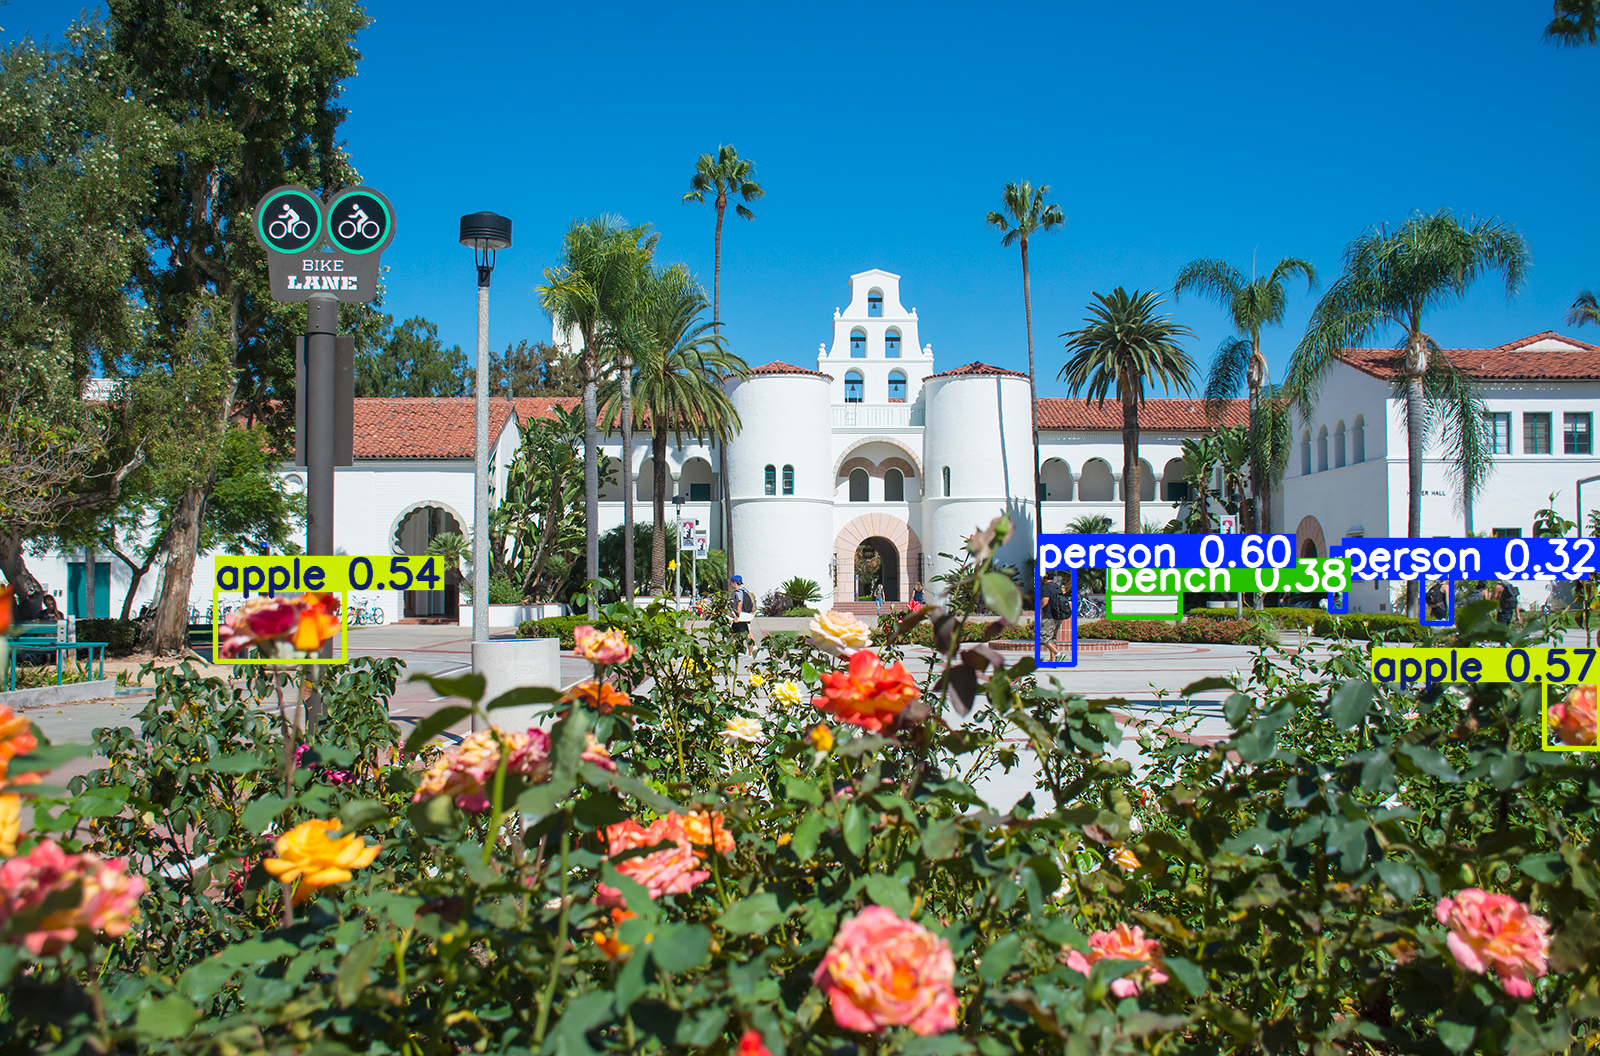

In [ ]:
Image.fromarray(result.plot()[:,:,::-1])

Courtesy of: https://www.freecodecamp.org/news/how-to-detect-objects-in-images-using-yolov8/

# 4. ✨ Generative Pretrained Transformers (GPT-2) 🖥️
## The Lore
This activity focuses on an earlier version of what we now know as ChatGPT.  ChatGPT, an AI-based chatbot developed by OpenAI, falls into the category of generative AI, a type of artificial intelligence that can be used to create text or images. The name GPT stands for "Generative Pre-trained Transformer" because it works by utilizing a large language model (LLM), which enables it to understand and generate dialogue using significant amounts of data which it was pretrained on. Transformers were a revolutionary breakthrough in deep learning, a subset of machine learning, back in 2017 due to its self-attention mechanism which helps models understand how the meaning of a word can change based on its context. This captures dependencies and relationships within input sequences

## Exploring early text generation of GPT-2
In our workshop, we'll be exploring OpenAI's 2019 model GPT-2. As of writing this workshop, (November 2024) OpenAI is on their fourth-ish model, GPT-4 Omni. ChatGPT's rise in popularity came from the release of the 3.5 model in late 2022.

### Installing and importing libraries
The transformers library provided pre-trained models and tools for natural language processing (NLP) tasks.

In this library, we're installing the tokenizer and model classes for GPT-2

In [ ]:
# Install Hugging Face's Transformers library
!pip install transformers --quiet

# Import required modules
from transformers import GPT2Tokenizer, GPT2LMHeadModel

### Loading pre-trained GPT-2 model and tokenizer

In our demo, we're using `gpt2-medium`, which is based on the base GPT-2 model, just with more hyperparameters (i.e. more data it was trained on).

Using a pre-trained model saves time and computational resources while granting us access to its language capabilitie. This is why using Google Colab's free GPU processor is goated.

In [ ]:
# Load pre-trained GPT-2 model and tokenizer
model_name = "gpt2-medium"  # You can also try "gpt2-medium" or "gpt2-large" for larger models
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

### Generating text
This defines a function that generates text based on an input prompt. By tokenization, the next best token is chosen based on the previous token inputs. We use hyperparameters to change the models outputs to our liking.

Try changing these values and see what happens with the output. If nothing happens, try changing the sampling hyperparameters.

#### Hyperparameters and what they do

`max_length` = length of generated text

`temperature` = controls the randomness and creativity

`top_k` = an integer that specifies how many of the most likely tokens (words) to consider

`top_p` = a probability value that considers the smallest set of tokens whose cumulative probability exceeds p (a threshold from 0 to 1). This includes more tokens which works better for context-sensitive sampling.

Experiment with these values until it feels right. We call this fine-tuning in machine learning.

In [ ]:
# Generate text
def generate_text(prompt, max_length=100,temperature=0.7, top_k=50):
  inputs = tokenizer(prompt, return_tensors="pt")
  outputs = model.generate(
      inputs.input_ids,
      max_length=max_length, # Length of generated text
      num_return_sequences=1,
      temperature=temperature,  # Controls randomness
      top_k=top_k,  # Filters unlikely words
      repetition_penalty=1.2, # Prevents repetition of sentences
      top_p=0.9 # Chooses from the top 10% of predicted words
  )
  return tokenizer.decode(outputs[0], skip_special_tokens=True)

### Entering your own prompt
Now it's your turn, see what your hyperparameters do to the model.

Enter in the start of a sentence and see what GPT-2 generates for you!

*Note: this was trained off of data from the internet, so there may be some bias (which is a constant problem that data scientists try to mitigate).*

In [ ]:
# Provide a prompt and generate text
prompt = "The cold wind swept through the air. I reached for my jacket and hummed a meloncholic tune."
generated_text = generate_text(prompt)
print("Generated Text:")
print(generated_text)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:595: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpect

Generated Text:
The cold wind swept through the air. I reached for my jacket and hummed a meloncholic tune.

"I'm going to be late."
, "You're not gonna believe this," or any of those other things that you hear in movies about people who are too busy being lazy to do anything but sit around waiting until they get home from work before getting out their phone so they can text each others' numbers when it's time! It was like watching someone else go


Not fond of what was generated? Adjust the `temperature` value and the `top_k` value to increase or decrease randomness.

# 🎁 Wrapping it up ✒️
I hope this gives you something cool to show your friends because I would've loved exploring machine learning by visual examples first before really diving into the theory. I think what really drew me into the field of machine learning and AI was honestly people's personal projects, and particularly the impressive things they can do with all of this open source stuff. AI Club also helped get my hands dirty in the good stuff.

If you're interested in the fundamentals of ML, take CS 549. CS 577 is also a good class... but it is more of a data science approach. Still, it's really good for the basics of developing models, though not the really cool ones...

If you liked the computer vision stuff, there's a course for that too called "Computer Vision." It's only offered periodically, so check my.SDSU to see if a professor is teaching it!

Hope you enjoyed this demo workshop!

💕


All the best,

Erica